In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error,roc_auc_score,root_mean_squared_error

In [2]:
#Predicting Sales through different Advertising channels
df=pd.read_csv('advertising.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: ylabel='Frequency'>

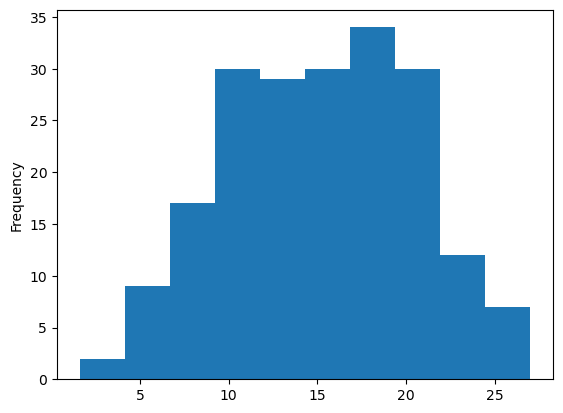

In [4]:
df['Sales'].plot(kind='hist')

In [5]:
import seaborn as sns

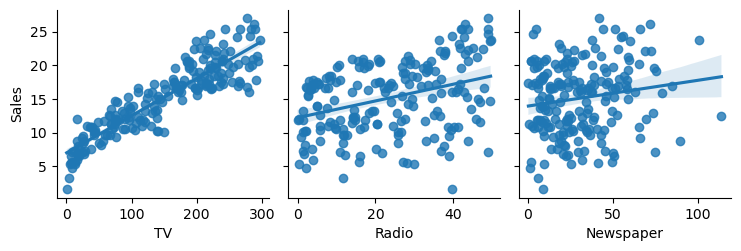

In [6]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg',palette='husl')

In [7]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [8]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
random_state=42)

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)

In [11]:
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [12]:
model.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [13]:
r2_score(y_test,y_pred)

0.9091484341849799

In [14]:
mean_absolute_error(y_test,y_pred)

1.1594875061090588

In [15]:
mean_squared_error(y_test,y_pred)

2.5416240362291496

In [17]:
#Normality of Residuals
residuals=y_test.values-y_pred
print(residuals)

[-0.25991908  1.86630497 -2.28914396 -2.2191455   3.09263164 -0.18101318
  1.21363655 -0.36054246 -0.61499951 -0.58789636  2.02415337  0.12354974
 -1.43212325 -2.87863567 -2.34605571  1.75513054 -2.84939536 -1.23858948
  0.17827826 -1.47740648 -1.2483297  -0.54035779 -0.11360656 -0.31142595
  1.89630216  0.11408709  0.83056632 -0.37882255 -0.23407064 -2.30419229
 -0.28597618  0.5972576   2.7478282  -2.14679243 -5.40720813 -0.37347295
 -0.62673775 -2.05273767 -0.67698182  0.35402794 -0.93411853 -0.43490068
  0.02588847  0.17840304 -0.51786382  0.31967323  0.00595136 -0.64356754
 -0.80742176  0.21607335  0.58527837  2.10115428 -3.62722434 -2.95839415
  0.36250319 -1.51183313  0.37448979  0.38099176 -0.39334943  0.96083737]


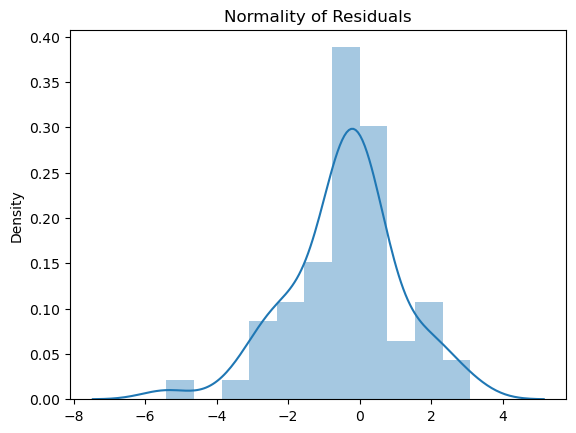

In [18]:
sns.distplot(residuals)
plt.title('Normality of Residuals')
plt.show()

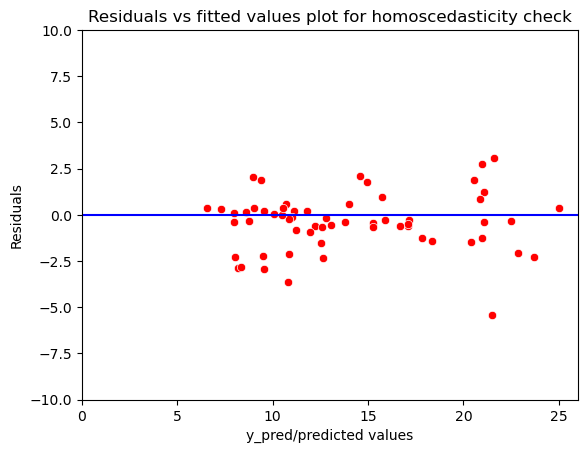

In [19]:
p = sns.scatterplot(x=y_pred,y=residuals,c='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

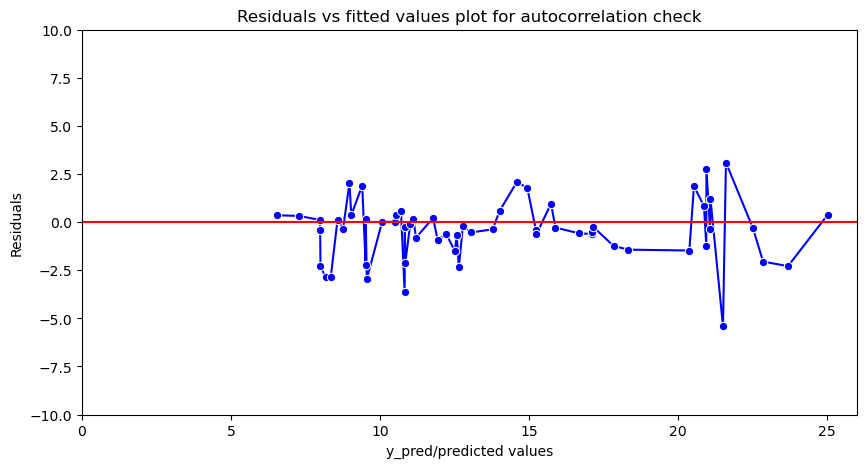

In [20]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [22]:
#Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Independent']=X.columns
vif['vif_score']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(vif)

  Independent  vif_score
0          TV   2.486772
1       Radio   3.285462
2   Newspaper   3.055245
